In our original proposal, we set out to create a Hangman game that a human could play, a basic rule-based bot, or a more advanced AI agent. The main objective was to compare how different strategies would solve the same word-guessing challenge. The bot was designed to guess letters based on a fixed ranking of English letter frequencies, while the AI would use statistical modeling and pattern recognition to make more intelligent guesses. To support this, we trained the AI using a dataset of English words with associated frequencies, enabling it to predict likely letters based on partial word patterns and word length. We also aimed to make the game replayable with detailed statistics tracking, allowing us to evaluate performance across thousands of simulations. The final implementation successfully supports all three modes of play, and our testing framework was able to simulate 50,000 games, revealing that the AI significantly outperformed the rule-based bot in both accuracy and consistency.


To support our AI Hangman system, we used two datasets. The primary dataset was Rachael Tatman’s English Word Frequency list, which includes words from the English language along with their usage frequency, sourced from the Google Web Trillion Word Corpus. This dataset contains a single key feature: the frequency count for each word, which we used to prioritize more common words during AI guessing. To complement this, we constructed a second dataset ourselves by analyzing the characters in the word list. Using a Python counter, we extracted three key features: Total Occurrences, Word Occurrences, and Letter Frequency. Total Occurrences measures how often each letter appears across the entire vocabulary. Word Occurrences counts how many individual words contain each letter (ignoring duplicates within a word). Finally, Letter Frequency was calculated by dividing the total occurrences of each letter by the total number of letters, giving us a normalized percentage. Frequency-based and pattern-based guessing strategies were both essential to our AI Hangman system because they addressed different stages of uncertainty during gameplay. For instance, frequency-based guessing helped early on by prioritizing common letters.


In [ ]:
for word in words:
    letter_total.update(word)
    letter_word_occurrence.update(set(word))  # Only count each letter once per word

# Step 3: Total number of letters (for percentages)
total_letters = sum(letter_total.values())

In [ ]:
Letter,Occurrences,Word_Occurrences,Frequency
a,227927,173719,9.153279389328919
b,55191,51338,2.2164054402350417
c,105207,91557,4.224988986443587
d,84511,75907,3.39386204561801
e,261655,187226,10.50775607372035...

The AI player in this Hangman implementation uses a hybrid strategy that combines pattern matching with probabilistic reasoning based on real-world word frequency data. During a preprocessing step, the AI analyzes a large collection of English words and constructs letter frequency distributions for each word length. These distributions serve as a statistical model indicating which letters are most likely to appear in words of a given length. During gameplay, the AI filters the word list to find candidates that match the current known letter pattern (e.g., _ a _ _ e) while excluding previously guessed incorrect letters. If any matching words are found, the AI calculates the weighted frequency of each remaining unguessed letter across these words and selects the most likely one. If no matches are found, it defaults to using the precomputed frequency distribution for that word length. This approach allows the AI to adapt to both the structural constraints of the game and the statistical likelihood of letters, significantly improving its guessing accuracy. In extensive testing with 50,000 games, the AI achieved a 91% win rate, outperforming a simpler bot that relied solely on static letter frequency, which achieved an 80% win rate. This demonstrates that the AI's combination of learned distributions and real-time pattern matching leads to more effective gameplay and better handling of edge cases and rare words.


In our AI Hangman implementation, several tunable parameters function similarly to hyperparameters and directly influence performance. First, we designed a word weighting formula that prioritizes words based on their frequency in a large corpus. This formula adjusts raw frequencies with a scaling factor and additional rules for the top 1,000 most common words. Tuning this formula would allow the AI to either emphasize highly frequent words more aggressively or distribute weight more evenly across the vocabulary.

In [ ]:
 # Normalize relative to the lowest freq you found manually
    weight = raw_freq / 12711

    # Penalize high-frequency (common) words
    if i < 30:
        weight = (i / 1000)  # Make them very low
    elif i < 1000:
        weight *= (i / 1000)  # Gradual reduction for semi-common words

Another important parameter is the minimum word length, currently set to exclude words shorter than three letters. This helps eliminate overly simple cases, but could be adjusted to include more edge scenarios or tailor difficulty.

In [ ]:
if word.isalpha() and len(word) >= 3 and checkWordContainsVowel(word):

Additionally, the letter distribution vectors used in our AI are generated by analyzing character frequencies across words of the same length. The smoothing and normalization of these vectors affect how the AI prioritizes certain letters when guessing, and they could be improved by adjusting how letter counts are scaled or balanced.

In [ ]:
    for length, ctr in length_freq.items():
        total = sum(ctr.values())
        vec = torch.zeros(26)
        for letter, cnt in ctr.items():
            vec[ord(letter) - ord('a')] = cnt / total
        dist[length] = vec
    return dist

Lastly, the guess strategy switch point for the bot—currently set to activate pattern-based guessing when only two attempts remain—is another tunable choice. Adjusting this threshold could significantly change the bot's behavior, making it more cautious or aggressive depending on the game state.

In [ ]:
guess = get_best_letter_from_likely_word(word_completion, guessed_letters, words, frequencies) \
        if attempts_remaining <= 2 else get_bot_guess(guessed_letters)

While we accomplished most of our core objectives, there were several planned features we did not have time to implement, most notably enabling the AI to learn across multiple games by adapting its strategy based on past outcomes. Currently, the AI uses the same statistical model in every game without adjusting its decision-making based on previous wins or losses. With more time, we would build a reinforcement learning loop or feedback system that tracks statistics such as success rates of guessed letters, frequent misclassifications, and word structures that tend to cause failure. This would allow the AI to gradually shift its guessing preferences, dynamically adjust its weighting strategy, and improve mid-game accuracy by blending contextual probabilities with pattern matching. Another improvement we would consider is implementing a seed-based word selection method, allowing us to generate identical game scenarios for both the bot and the AI. By ensuring both models face the same sequence of words and game conditions, we could make more accurate and controlled comparisons between their performances. This would eliminate variability caused by random word selection and allow for more rigorous evaluation of which strategy performs better under identical circumstances.


The AI significantly outperformed the bot, with the AI winning 45,409 out of 50,000 games, resulting in a win rate of 90.82%, while the bot won 40,108 games, with a win rate of 80.22%. The goal was for the system to achieve an 80% win rate, which we exceeded, showing the potential for improvement with additional game rounds and learning opportunities. In terms of insights gained from analyzing frequency-based guessing, we found that the bot, relying solely on static letter frequency, struggled with words that had irregular letter patterns. The AI, however, was much more adaptable, using learned distributions and contextual clues to handle such cases more effectively. One lesson from the AI’s performance was the importance of having a dynamic learning process that evolves over time. While the static approach of the bot provided decent performance, the AI’s ability to adjust based on the partial word patterns during gameplay contributed to its superior win rate.


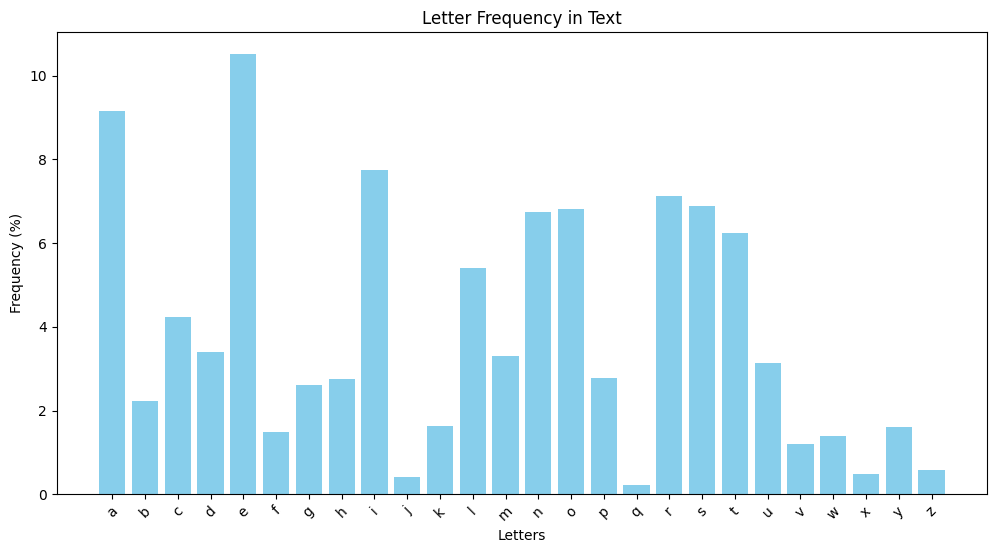

In [5]:
#Graphs
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with correct delimiter
file_path = "letter_frequency.csv"  # Update the file path if needed
df = pd.read_csv(file_path, delimiter=",", names=["Letter", "Occurrences", "Word_Occurrences", "Frequency"], header=0)

# Strip whitespace from column names (just in case)
df.columns = df.columns.str.strip()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(df["Letter"], df["Frequency"], color="skyblue")

# Labels and title
plt.xlabel("Letters")
plt.ylabel("Frequency (%)")
plt.title("Letter Frequency in Text")
plt.xticks(rotation=45)  # Rotate letters for better visibility

# Show the plot
plt.show()

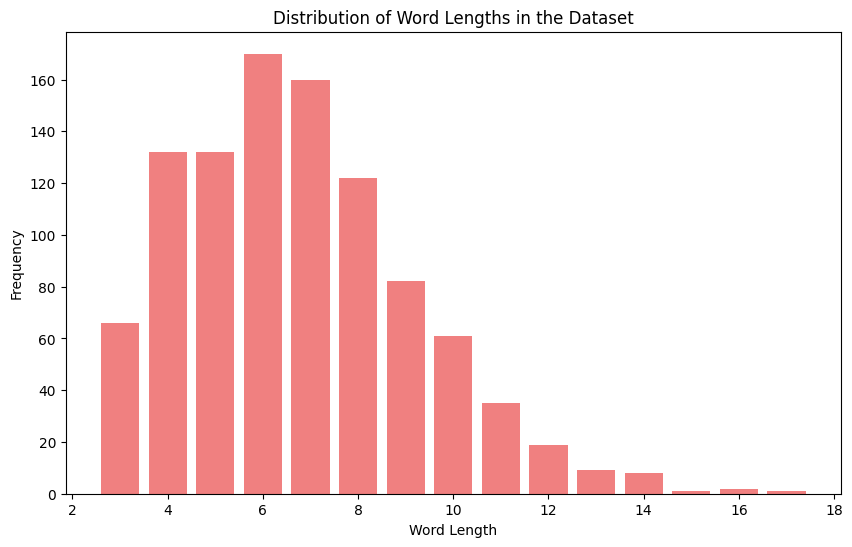

In [8]:
# Load the CSV file with correct delimiter
file_path = "hangmanAItest1_batch_results.csv"  # Update the file path if needed
df = pd.read_csv(file_path, delimiter=",", names=["word", "won", "word_length", "attempts_used", "total_guesses"], header=0)

# Strip whitespace from column names (just in case)
df.columns = df.columns.str.strip()

# Count occurrences of each word length
word_length_counts = df["word_length"].value_counts().sort_index()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(word_length_counts.index, word_length_counts.values, color="lightcoral")

# Labels and title
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Word Lengths in the Dataset")

# Show the plot
plt.show()

The AI used word length and letter frequency to figure out what word it was based on its length and the positions of the letters which is what a human would do when playing the hangman game, however it was a bit smarter in the way it went about it becasue it had access to all the possible words it could be becasue it was trained on the word libray dataset or at least the one we desinged with gpu did which definatly gives it a bit of an advantage rather than the bot having to just guess letters and not being aware of the size of the word or position of the letters.

In conclusion, this project demonstrated the effectiveness of using AI and frequency analysis to improve the performance of a simple word-guessing game. While we didn’t have time to implement certain advanced features, the current implementation shows the potential for even better performance with additional time and learning from multiple games. Future work could involve integrating reinforcement learning, adding neural network models, and creating a feedback loop to further enhance the AI's adaptability.
